In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('credit_dataset.csv')
data.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [2]:
data.shape

(100514, 19)

In [3]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [4]:
data['Loan Status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [5]:
data.Purpose = data.Purpose.str.lower()
data.Purpose.value_counts()

debt consolidation      78552
other                    9287
home improvements        5839
business loan            1569
buy a car                1265
medical bills            1127
buy house                 678
take a trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
educational expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

 # EDA (exploratory data analysis)

In [6]:
data.describe().round(2) #main stats of numeric attributes

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,8.084600e+04,100000.00,100000.00,46859.0,100000.00,100000.00,100000.00,9.999800e+04,99796.00,99990.00
mean,11760447.39,1076.46,1.378277e+06,18472.41,18.20,34.9,11.13,0.17,294637.38,7.607984e+05,0.12,0.03
std,31783942.55,1475.40,1.081360e+06,12174.99,7.02,22.0,5.01,0.48,376170.93,8.384503e+06,0.35,0.26
min,10802.00,585.00,7.662700e+04,0.00,3.60,0.0,0.00,0.00,0.00,0.000000e+00,0.00,0.00
25%,179652.00,705.00,8.488440e+05,10214.16,13.50,16.0,8.00,0.00,112670.00,2.734380e+05,0.00,0.00
50%,312246.00,724.00,1.174162e+06,16220.30,16.90,32.0,10.00,0.00,209817.00,4.678740e+05,0.00,0.00
75%,524942.00,741.00,1.650663e+06,24012.06,21.70,51.0,14.00,0.00,367958.75,7.829580e+05,0.00,0.00
max,99999999.00,7510.00,1.655574e+08,435843.28,70.50,176.0,76.00,15.00,32878968.00,1.539738e+09,7.00,15.00


In [7]:
data.describe(include=[np.object])  #main stats of categoric attributes

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,100000,100000,100000,100000,95778,100000,100000
unique,81999,81999,2,2,11,4,15
top,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,Short Term,10+ years,Home Mortgage,debt consolidation
freq,2,2,77361,72208,31121,48410,78552


In [8]:
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [9]:
 #Data Cleaning/Preprocessing 
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [10]:
print(data.drop_duplicates(inplace=True))

None


In [11]:
x = data["Monthly Debt"].mean()
y = data['Annual Income'].mean()
z = data['Credit Score'].mean()
a = data['Bankruptcies'].mean()

data["Monthly Debt"].fillna(x, inplace = True)
data["Annual Income"].fillna(y, inplace = True)
data['Credit Score'].fillna(z, inplace = True)
data['Bankruptcies'].fillna(a, inplace = True)

data.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,home improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,1130.830598,1.375894e+06,10+ years,Home Mortgage,debt consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,debt consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,debt consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1130.830598,1.375894e+06,5 years,Rent,debt consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,debt consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.000000,1.184194e+06,< 1 year,Home Mortgage,debt consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,1130.830598,1.375894e+06,< 1 year,Home Mortgage,buy house,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.000000,2.559110e+06,2 years,Rent,debt consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.000000,1.454735e+06,< 1 year,Rent,debt consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [12]:
data.isnull().sum()

Loan ID                             1
Customer ID                         1
Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                        0
Annual Income                       0
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        0
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                        0
Tax Liens                          10
dtype: int64

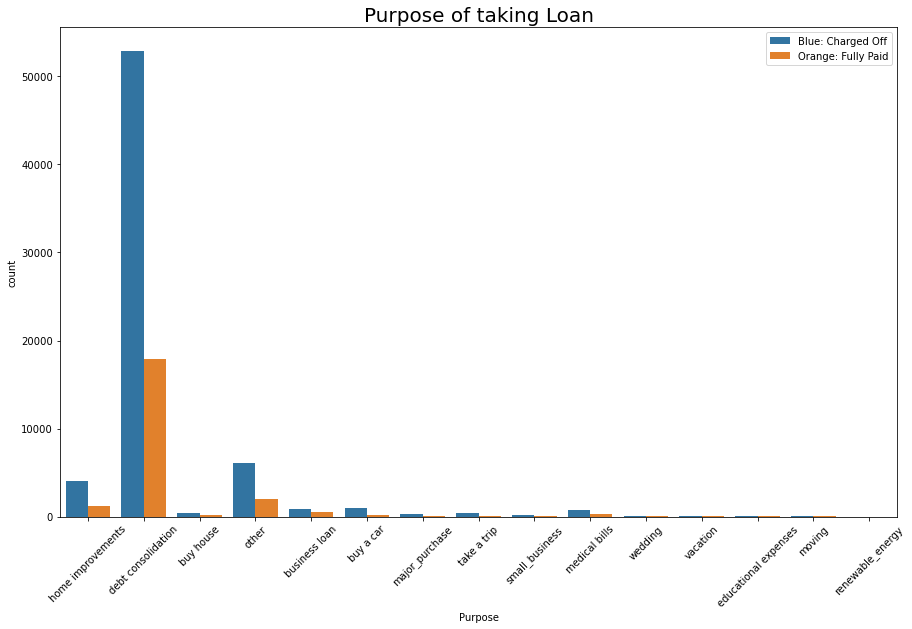

In [13]:
#count of purpose of taking loan,status of loan-wise 
plt.figure(figsize=(15,9))
sns.countplot(x='Purpose',data=data,hue='Loan Status')
plt.xticks(rotation=45)
plt.legend(["Blue: Charged Off","Orange: Fully Paid",])
plt.title('Purpose of taking Loan',fontdict={'fontsize':20})
plt.show()

Short Term    66023
Long Term     23762
Name: Term, dtype: int64


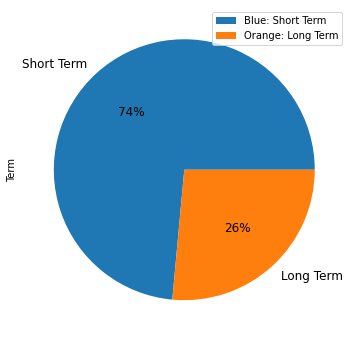

In [14]:
#loan taken for short or long term
data.Term.value_counts().plot(kind='pie', fontsize=12,autopct='%1.0f%%', figsize=(14,6), textprops={'color':"black"})
plt.legend(["Blue: Short Term","Orange: Long Term"])
print(data.Term.value_counts())


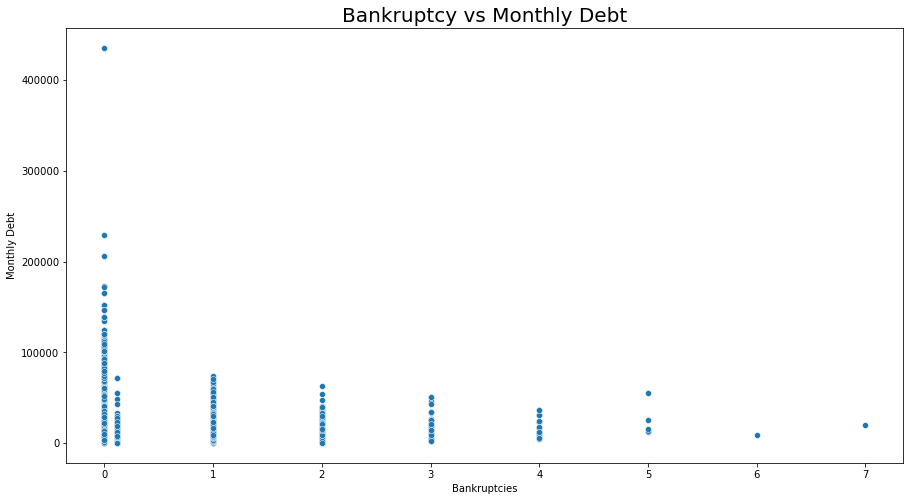

In [15]:
#Distribution for bankruptcy vs monthly debt
plt.figure(figsize=(15,8))
sns.scatterplot(x=data['Bankruptcies'],y=data['Monthly Debt'],palette='dark')
plt.title('Bankruptcy vs Monthly Debt',fontdict={'fontsize':20})
plt.show()

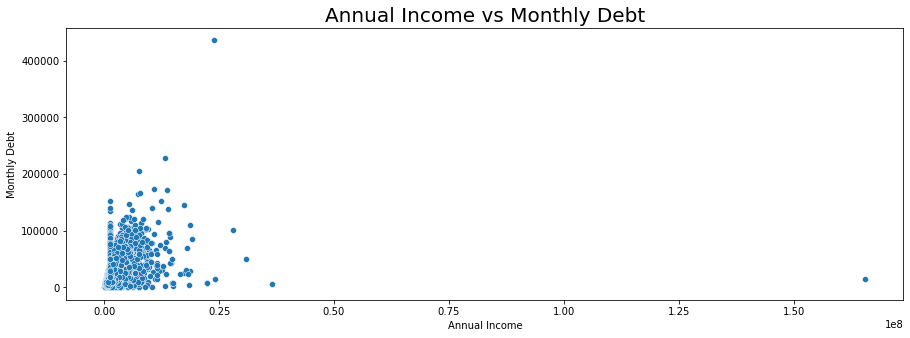

In [16]:
#Distribution for Annual Income vs monthly debt
plt.figure(figsize=(15,5))
sns.scatterplot(x=data['Annual Income'],y=data['Monthly Debt'],palette='dark')
plt.title('Annual Income vs Monthly Debt',fontdict={'fontsize':20})
plt.show()

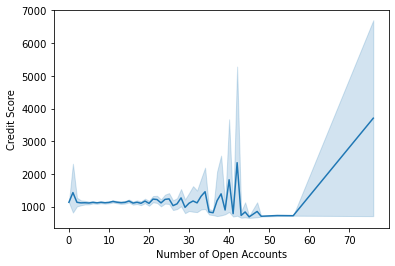

In [17]:
sns.lineplot(x='Number of Open Accounts', y='Credit Score', data=data)
plt.show()

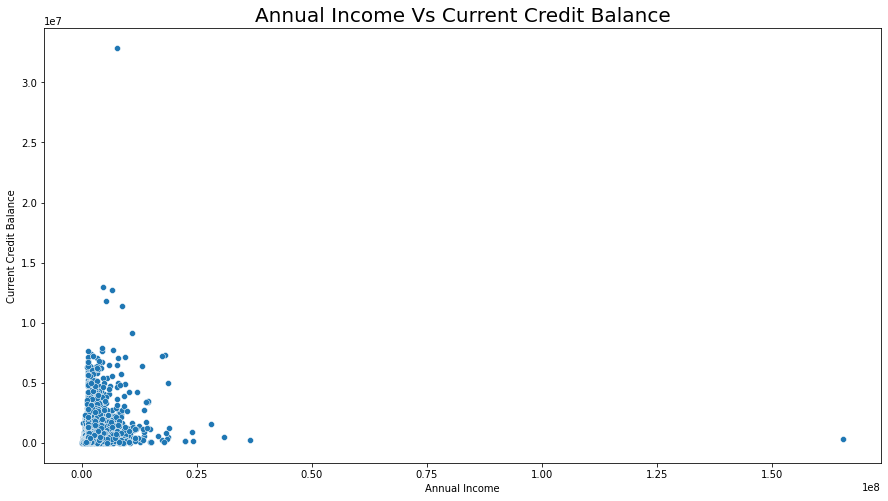

In [18]:
#Distribution for Annual Income Vs Current Credit Balance
plt.figure(figsize=(15,8))
sns.scatterplot(x=data['Annual Income'],y=data['Current Credit Balance'])
plt.title('Annual Income Vs Current Credit Balance',fontdict={'fontsize':20})
plt.show()

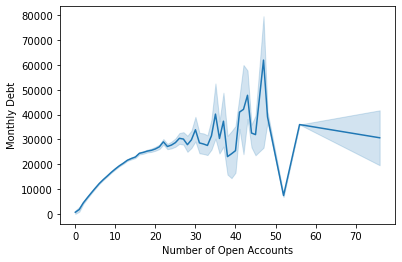

In [19]:
sns.lineplot(x='Number of Open Accounts', y='Monthly Debt', data=data)
plt.show()

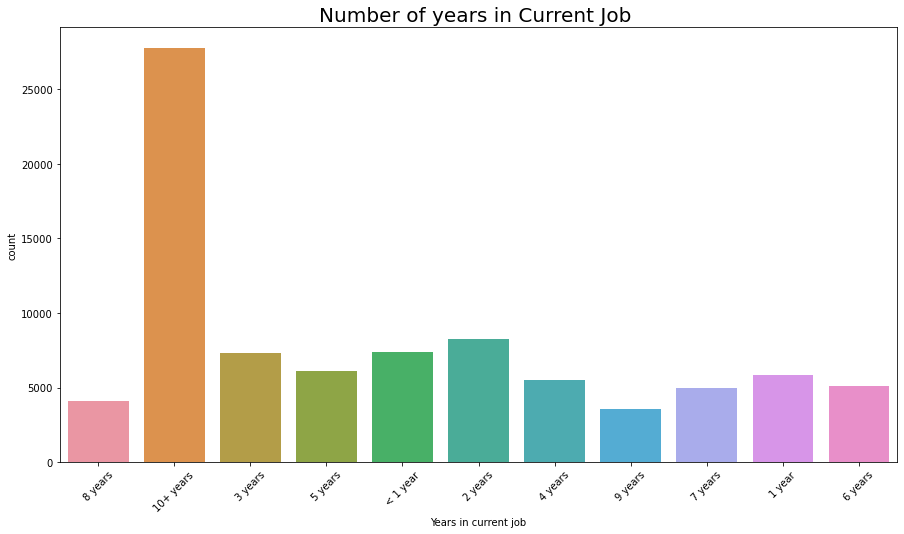

In [20]:
#years in job count
plt.figure(figsize=(15,8))
sns.countplot(x='Years in current job',data=data)
plt.xticks(rotation=45)
plt.title('Number of years in Current Job ',fontdict={'fontsize':20})
plt.show()

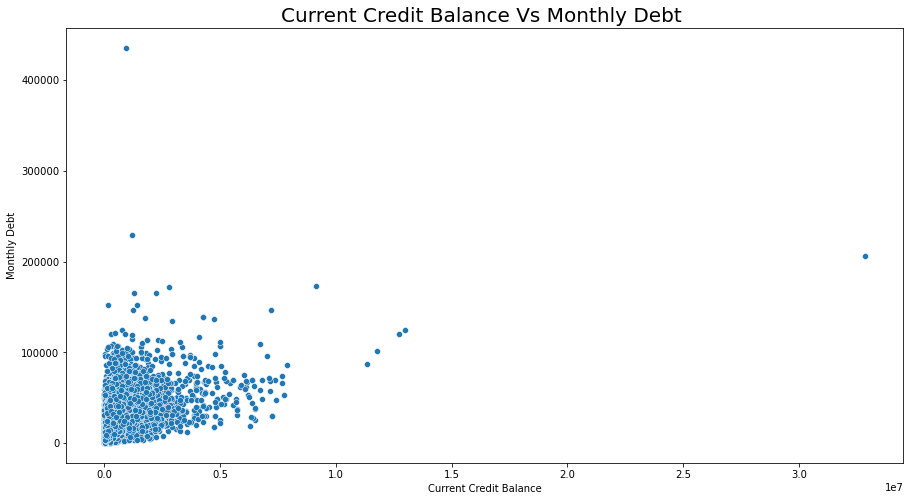

In [21]:
#Current Credit Balance Vs Monthly Debt
plt.figure(figsize=(15,8))
sns.scatterplot(y=data['Monthly Debt'], x=data['Current Credit Balance'],palette='dark')
plt.title('Current Credit Balance Vs Monthly Debt ',fontdict={'fontsize':20})
plt.show()

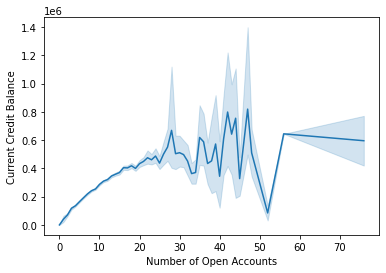

In [22]:
sns.lineplot(x='Number of Open Accounts', y='Current Credit Balance', data=data)
plt.show()

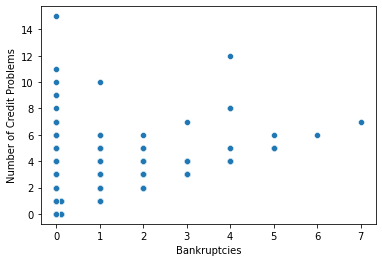

In [23]:
sns.scatterplot(x='Bankruptcies', y='Number of Credit Problems', data=data)
plt.show()

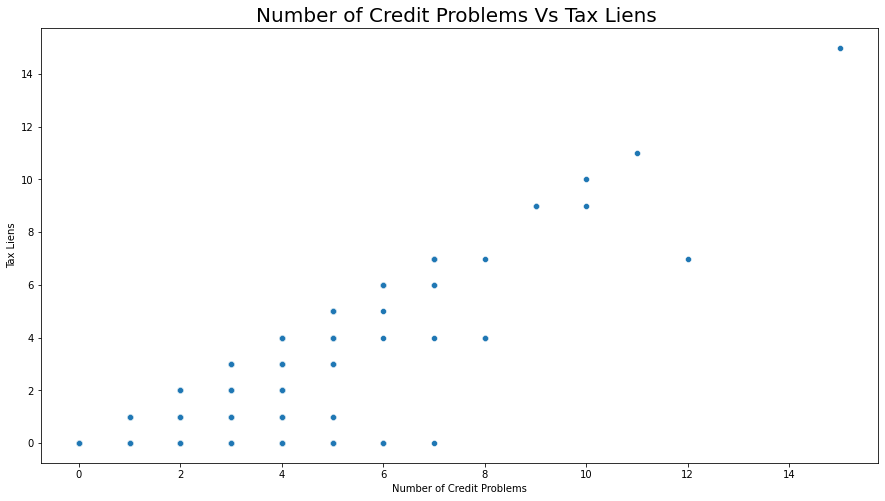

In [24]:
#Number of Credit Problems Vs Tax Liens
plt.figure(figsize=(15,8))
sns.scatterplot(y=data['Tax Liens'],x=data['Number of Credit Problems'],palette='dark')
plt.title('Number of Credit Problems Vs Tax Liens ',fontdict={'fontsize':20})
plt.show()

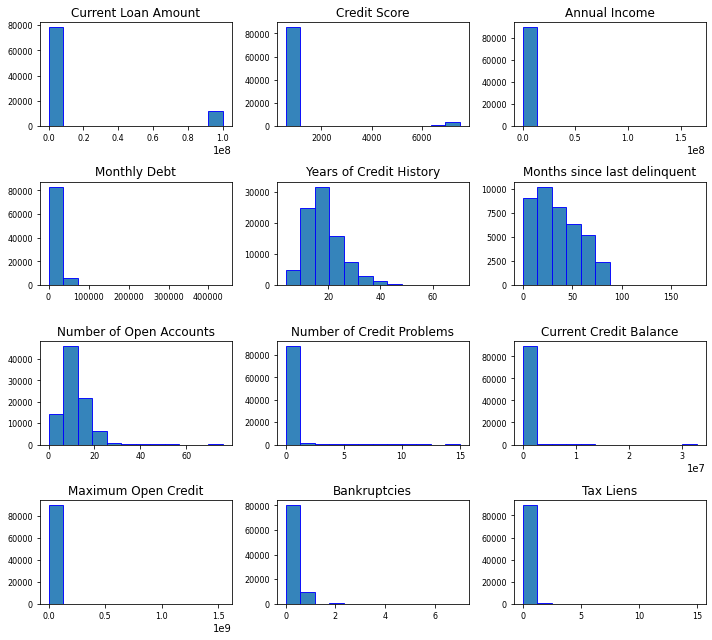

In [25]:
data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

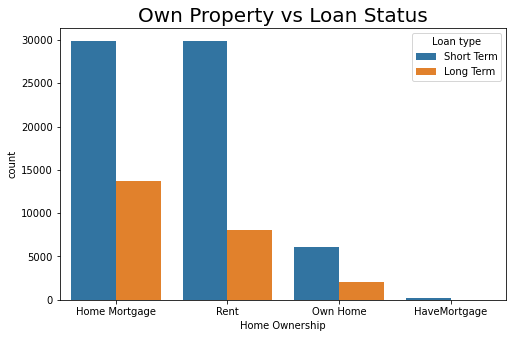

In [26]:
#Count of Own Property Vs Loan Status
plt.figure(figsize=(8,5))
sns.countplot(x='Home Ownership',data=data ,order = data['Home Ownership'].value_counts().index,hue='Term')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

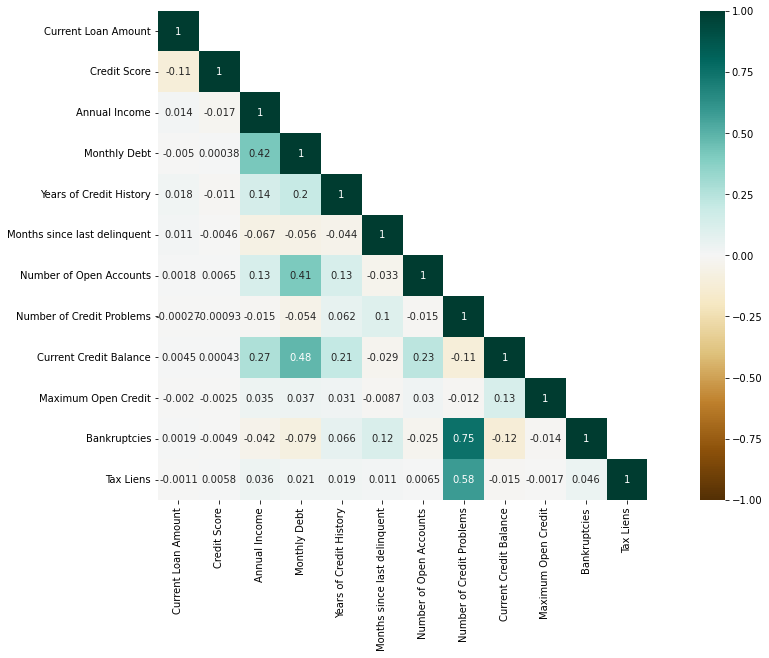

In [27]:
mask = np.triu(data.corr(), 1)                  #correlation between parameters
plt.figure(figsize=(19, 9))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

# Machine Learning Models

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
lis=['Loan Status','Term','Home Ownership','Purpose']
for i in lis:
    data[i]=le.fit_transform(data[i])

In [30]:
x=data.drop(['Loan ID','Customer ID','Loan Status','Years in current job'],1).fillna(0)
y=data['Loan Status']

In [31]:
x.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,1,709.000000,1.167493e+06,1,5,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,1,1130.830598,1.375894e+06,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,1,741.000000,2.231892e+06,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,0,721.000000,8.069490e+05,2,3,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,1,1130.830598,1.375894e+06,3,3,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(    #random state specifies that the sample test data remains same
    X, y, test_size=0.1, random_state=10)

In [34]:
X_train.round(2)

array([[-0.38,  0.6 ,  0.  , ..., -0.05, -0.33, -0.11],
       [-0.39, -1.67, -0.33, ..., -0.04, -0.33, -0.11],
       [-0.39,  0.6 , -0.27, ..., -0.04, -0.33, -0.11],
       ...,
       [-0.39,  0.6 , -0.29, ..., -0.02, -0.33, -0.11],
       [ 2.61,  0.6 , -0.27, ..., -0.05, -0.33, -0.11],
       [-0.38,  0.6 ,  0.  , ...,  0.16, -0.33, -0.11]])

In [35]:
y_train.round(2).fillna(0)

42541    1
94318    1
26120    1
65636    1
80865    1
        ..
39113    1
10304    0
9459     0
53337    1
91845    1
Name: Loan Status, Length: 80807, dtype: int32

In [36]:
y_test.round(2)

79779    1
24029    1
7183     1
87303    1
87192    1
        ..
74501    1
79683    1
21527    1
67455    1
74541    0
Name: Loan Status, Length: 8979, dtype: int32

## Logistic regression

In [37]:
model=LogisticRegression()
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [38]:
#Lower recall and higher precision give you great accuracy but then it misses a large number of instances.
# More the F1 score better will be performance.
from sklearn.metrics import classification_report
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.21      0.34      2269
           1       0.79      1.00      0.88      6710

    accuracy                           0.80      8979
   macro avg       0.87      0.60      0.61      8979
weighted avg       0.83      0.80      0.74      8979



In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error for the dataset is:",mean_absolute_error(y_test,predict))
print("Mean Squared Error for the dataset is:",mean_squared_error(y_test,predict))

Mean Absolute Error for the dataset is: 0.20224969372981402
Mean Squared Error for the dataset is: 0.20224969372981402


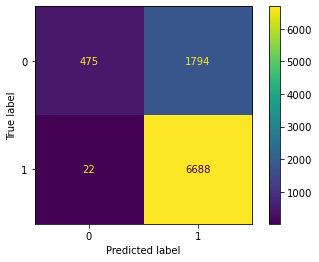

In [40]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(model,X_test,y_test)
plt.show(pl)

## Decision tree classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
modeld=DecisionTreeClassifier()
modeld.fit(X_train,y_train)
predictd=modeld.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
report=classification_report(y_test,predictd)
print(report)

              precision    recall  f1-score   support

           0       0.43      0.44      0.44      2269
           1       0.81      0.80      0.81      6710

    accuracy                           0.71      8979
   macro avg       0.62      0.62      0.62      8979
weighted avg       0.71      0.71      0.71      8979



In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,predictd)
mae=mean_absolute_error(y_test,predictd)
print(f'Mean Squared Error for this model is :{mse} \nMean Absolute Error is :{mae} ')

Mean Squared Error for this model is :0.2890076845973939 
Mean Absolute Error is :0.2890076845973939 


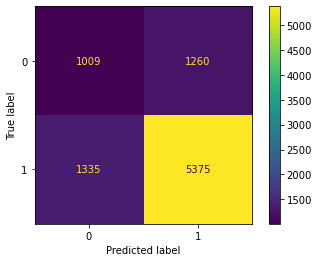

In [44]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(modeld,X_test,y_test)
plt.show(pl)

# XGBoostClassifier

In [45]:
from xgboost import XGBClassifier
modelg=XGBClassifier()
modelg.fit(X_train,y_train)
predictg=modelg.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
report=classification_report(y_test,predictg)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.26      0.39      2269
           1       0.80      0.98      0.88      6710

    accuracy                           0.80      8979
   macro avg       0.80      0.62      0.63      8979
weighted avg       0.80      0.80      0.75      8979



In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,predictg)
mae=mean_absolute_error(y_test,predictg)
print(f'Mean Squared Error for this model is :{mse} \nMean Absolute Error is :{mae} ')

Mean Squared Error for this model is :0.20369751642721906 
Mean Absolute Error is :0.20369751642721906 


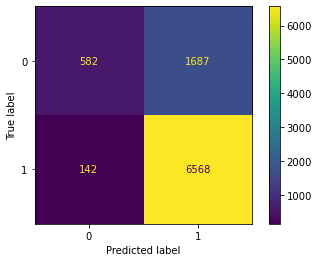

In [48]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(modelg,X_test,y_test)
plt.show(pl)

# Predicting on test Set

In [49]:
##XGBoost 
y_pred = modelg.predict(X_test)

# Let us convert 1 and 0 into Will be Fully Paid and Need to Charge off respectively
y_pred = list(map(lambda x: 'Will be Fully Paid' if x==1 else 'Need to Charge Off' ,y_pred))
y_pred = np.array(y_pred)
y_pred[:25]

array(['Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Need to Charge Off',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid'], dtype='<U18')

In [50]:
##Logistic Regression
y_pred = model.predict(X_test)

# Let us convert 1 and 0 into Will be Fully Paid and Need to Charge off respectively
y_pred = list(map(lambda x: 'Will be Fully Paid' if x==1 else 'Need to Charge Off' ,y_pred))
y_pred = np.array(y_pred)
y_pred[:25]

array(['Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Need to Charge Off',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid', 'Will be Fully Paid', 'Will be Fully Paid',
       'Will be Fully Paid'], dtype='<U18')